In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('datasets/churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [106]:
data['Churn'].value_counts()

Churn
0.0    5174
1.0    1869
Name: count, dtype: int64

In [13]:
data.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   float64
 1   SeniorCitizen     7043 non-null   float64
 2   Partner           7043 non-null   float64
 3   Dependents        7043 non-null   float64
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   float64
 6   MultipleLines     7043 non-null   float64
 7   InternetService   7043 non-null   float64
 8   OnlineSecurity    7043 non-null   float64
 9   OnlineBackup      7043 non-null   float64
 10  DeviceProtection  7043 non-null   float64
 11  TechSupport       7043 non-null   float64
 12  StreamingTV       7043 non-null   float64
 13  StreamingMovies   7043 non-null   float64
 14  Contract          7043 non-null   float64
 15  PaperlessBilling  7043 non-null   float64
 16  PaymentMethod     7043 non-null   float64


In [5]:
data.drop("customerID",axis=1,inplace=True)
data.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1791,Female,0,Yes,No,44,Yes,No,DSL,Yes,Yes,Yes,No,No,No,One year,Yes,Mailed check,61.50,2722.2,No
3695,Female,0,Yes,Yes,32,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.85,3089.6,No
3524,Female,1,No,No,11,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Credit card (automatic),84.80,906.85,Yes
1960,Female,0,Yes,Yes,33,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,No,No,Month-to-month,No,Credit card (automatic),88.60,2888.7,No
5578,Female,0,Yes,Yes,42,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,833.55,No


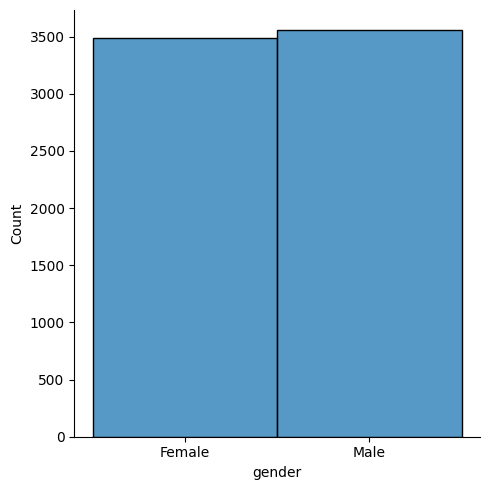

In [6]:
sns.displot(x=data['gender'])
plt.show()

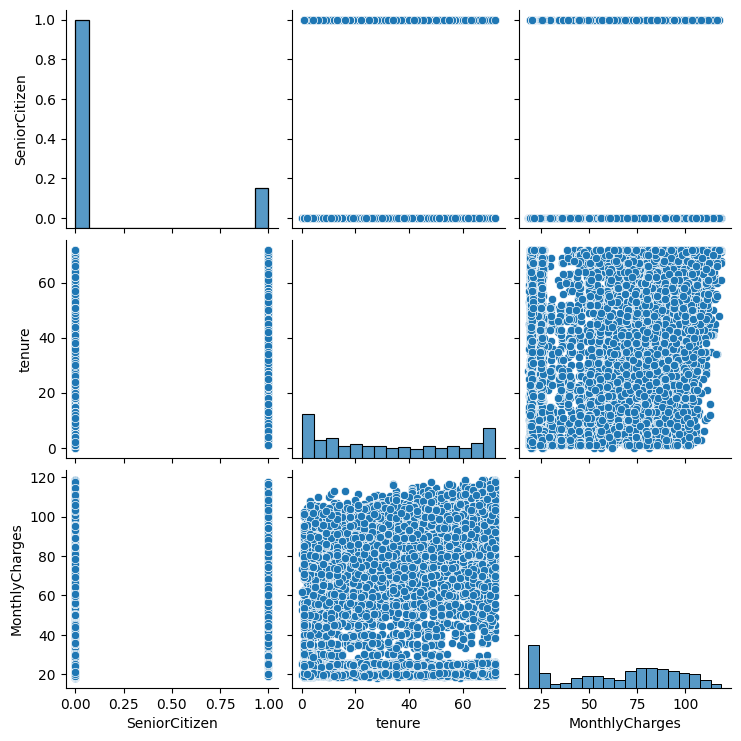

In [7]:
sns.pairplot(data,kind='scatter')
plt.show()

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [9]:
ord = OrdinalEncoder()
data[['gender','SeniorCitizen','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','TotalCharges','Churn']] = ord.fit_transform(data[['gender','SeniorCitizen','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','TotalCharges','Churn']])
data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0.0,0.0,1.0,0.0,1,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.85,2505.0,0.0
1,1.0,0.0,0.0,0.0,34,1.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,1466.0,0.0
2,1.0,0.0,0.0,0.0,2,1.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,157.0,1.0
3,1.0,0.0,0.0,0.0,45,0.0,1.0,0.0,2.0,0.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,42.30,1400.0,0.0
4,0.0,0.0,0.0,0.0,2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,925.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1.0,0.0,1.0,1.0,24,1.0,2.0,0.0,2.0,0.0,2.0,2.0,2.0,2.0,1.0,1.0,3.0,84.80,1597.0,0.0
7039,0.0,0.0,1.0,1.0,72,1.0,2.0,1.0,0.0,2.0,2.0,0.0,2.0,2.0,1.0,1.0,1.0,103.20,5698.0,0.0
7040,0.0,0.0,1.0,1.0,11,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.60,2994.0,0.0
7041,1.0,1.0,1.0,0.0,4,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,74.40,2660.0,1.0


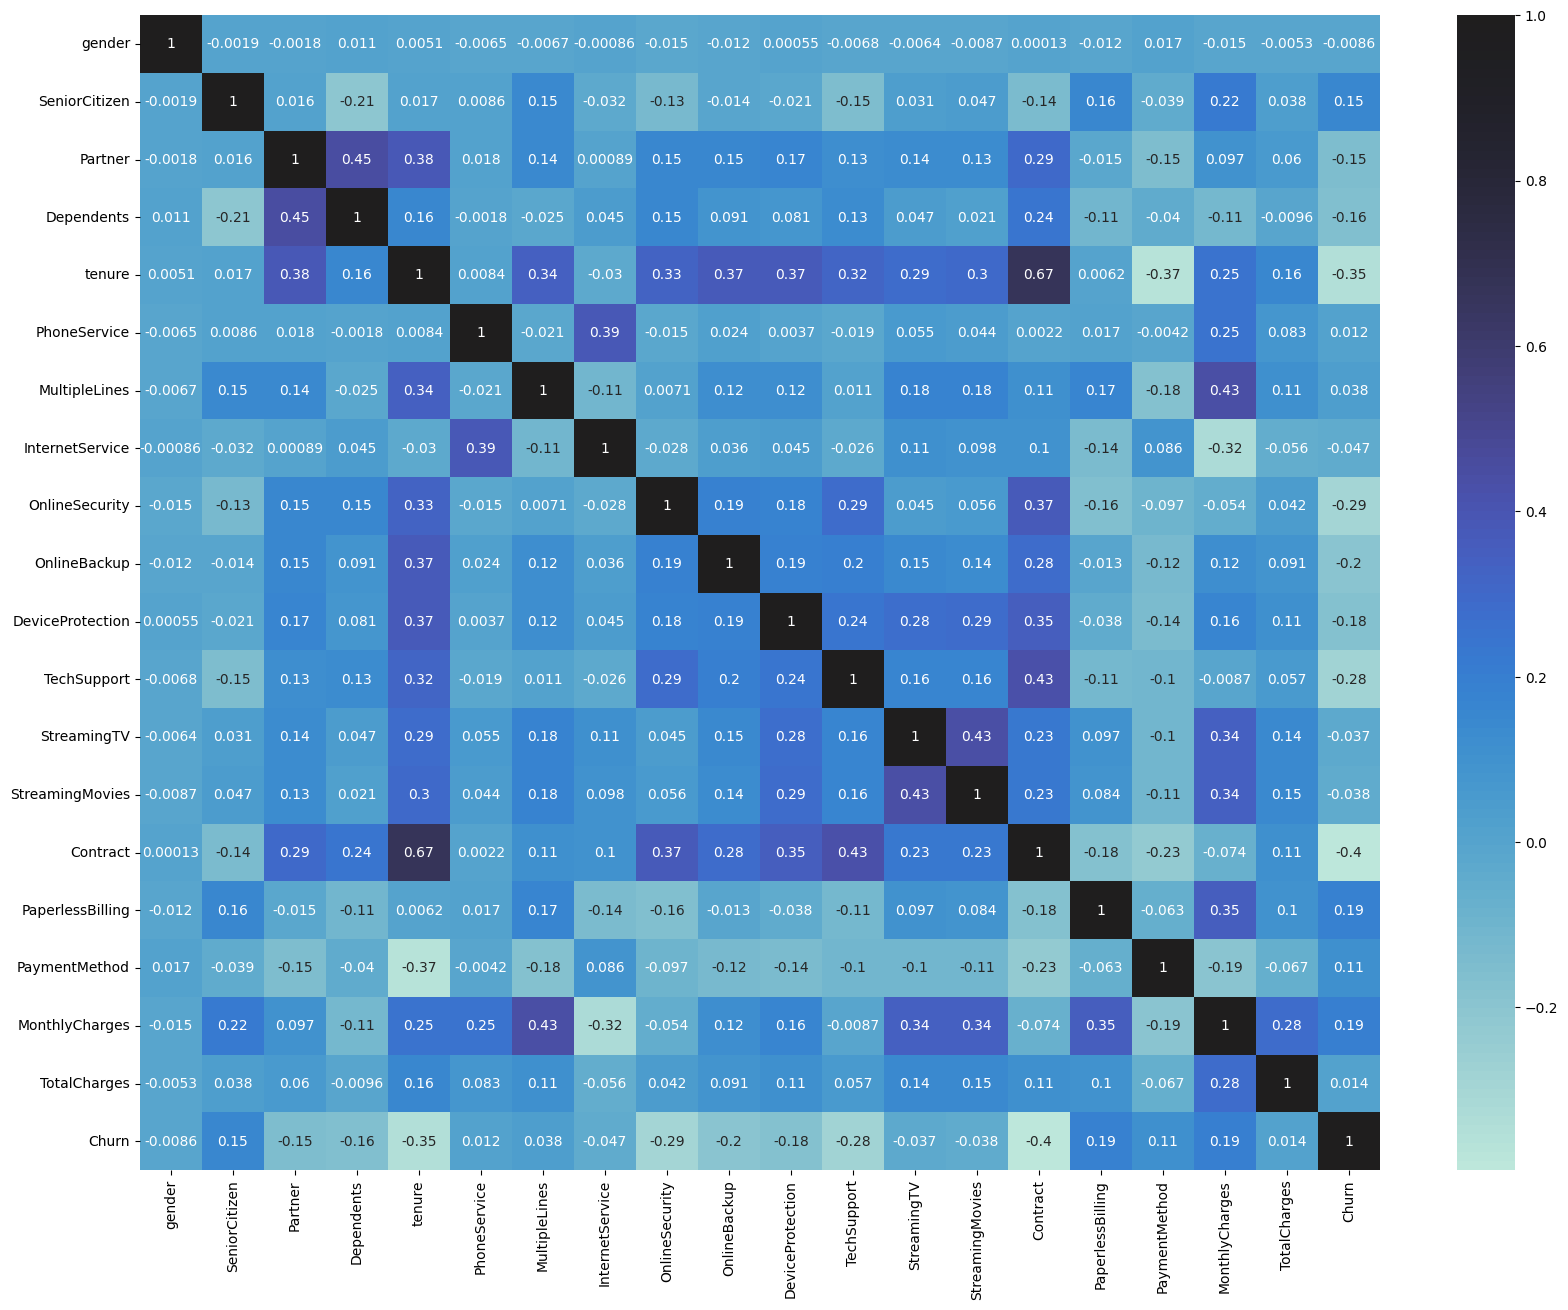

In [10]:
plt.figure(figsize=(20,15))
sns.heatmap(data.corr(),annot=True,center=1)
plt.show()

In [11]:
data.corrwith(data['Churn'])

gender             -0.008612
SeniorCitizen       0.150889
Partner            -0.150448
Dependents         -0.164221
tenure             -0.352229
PhoneService        0.011942
MultipleLines       0.038037
InternetService    -0.047291
OnlineSecurity     -0.289309
OnlineBackup       -0.195525
DeviceProtection   -0.178134
TechSupport        -0.282492
StreamingTV        -0.036581
StreamingMovies    -0.038492
Contract           -0.396713
PaperlessBilling    0.191825
PaymentMethod       0.107062
MonthlyCharges      0.193356
TotalCharges        0.014479
Churn               1.000000
dtype: float64

In [12]:
data.corrwith(data['Churn']).sum()

-0.43245489881303123

In [15]:
x_data = data.drop('Churn',axis=1)
y_data = data['Churn']

In [19]:
x_train,x_test,y_train,y_test = train_test_split(x_data,y_data,test_size=0.2,random_state=42)

In [22]:
print("TRAIN DATA")
print(x_train.shape)
print(y_train.shape)

TRAIN DATA
(5634, 19)
(5634,)


In [23]:
print('TEST DATA')
print(x_test.shape)
print(y_test.shape)

TEST DATA
(1409, 19)
(1409,)


* `GaussianNB`

In [25]:
gnb = GaussianNB()
gnb.fit(x_train,y_train)

GaussianNB()

In [26]:
gnb.score(x_test,y_test)

0.758694109297374

In [27]:
gnb_pred = gnb.predict(x_test)

In [37]:
print(classification_report(gnb_pred,y_test))

              precision    recall  f1-score   support

         0.0       0.75      0.90      0.82       864
         1.0       0.77      0.53      0.63       545

    accuracy                           0.76      1409
   macro avg       0.76      0.72      0.73      1409
weighted avg       0.76      0.76      0.75      1409



In [38]:
confusion_matrix(gnb_pred,y_test)

array([[780,  84],
       [256, 289]], dtype=int64)

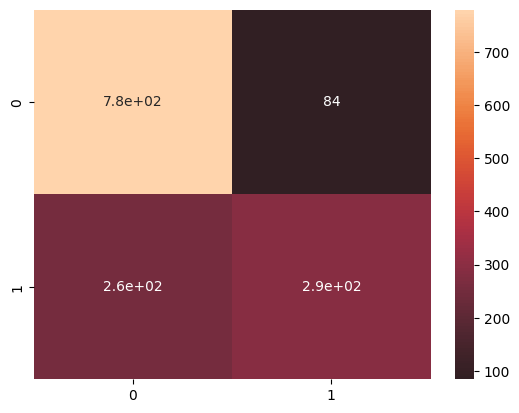

In [41]:
sns.heatmap(confusion_matrix(gnb_pred,y_test),annot=True,center=2)
plt.show()

In [55]:
result =  cross_val_score(gnb,x_test,y_test,scoring="neg_mean_squared_error",cv=10)
print(result)
print((result).mean())
print((result).std())

[-0.16312057 -0.24113475 -0.26241135 -0.22695035 -0.23404255 -0.30496454
 -0.23404255 -0.23404255 -0.24113475 -0.27142857]
-0.24132725430597768
0.034471130144066525


* `LogisticRegression`

In [46]:
lr  = LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [47]:
lr.score(x_test,y_test)

0.8147622427253371

In [48]:
lr_pred = lr.predict(x_test)

In [50]:
print(classification_report(lr_pred,y_test))

              precision    recall  f1-score   support

         0.0       0.91      0.85      0.88      1101
         1.0       0.56      0.68      0.62       308

    accuracy                           0.81      1409
   macro avg       0.73      0.77      0.75      1409
weighted avg       0.83      0.81      0.82      1409



In [51]:
confusion_matrix(lr_pred,y_test)

array([[938, 163],
       [ 98, 210]], dtype=int64)

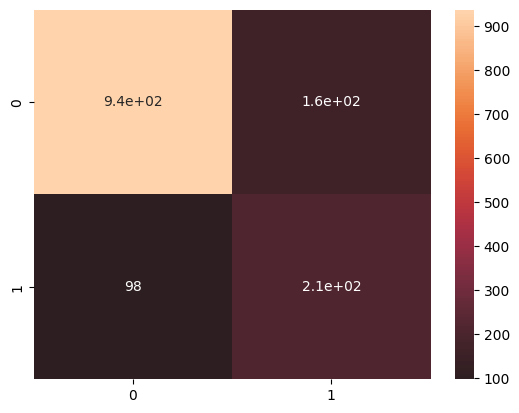

In [53]:
sns.heatmap(confusion_matrix(lr_pred,y_test),annot=True,center=15)
plt.show()

In [54]:
result =  cross_val_score(lr,x_test,y_test,scoring="neg_mean_squared_error",cv=10)
print(result)
print((result).mean())
print((result).std())

[-0.13475177 -0.17730496 -0.22695035 -0.15602837 -0.20567376 -0.22695035
 -0.18439716 -0.21985816 -0.19148936 -0.22142857]
-0.19448328267477205
0.030092860763421016


* `KNeighborsClassifier`

In [56]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [57]:
knn.score(x_test,y_test)

0.7643718949609652

In [58]:
knn_pred = knn.predict(x_test)

In [59]:
print(classification_report(knn_pred,y_test))

              precision    recall  f1-score   support

         0.0       0.90      0.81      0.85      1152
         1.0       0.40      0.58      0.47       257

    accuracy                           0.76      1409
   macro avg       0.65      0.69      0.66      1409
weighted avg       0.81      0.76      0.78      1409



In [60]:
confusion_matrix(knn_pred,y_test)

array([[928, 224],
       [108, 149]], dtype=int64)

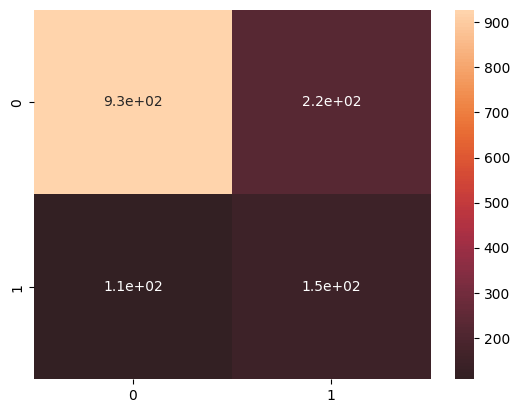

In [62]:
sns.heatmap(confusion_matrix(knn_pred,y_test),annot=True,center=6)
plt.show()

In [63]:
result =  cross_val_score(lr,x_test,y_test,scoring="neg_mean_squared_error",cv=10)
print(result)
print((result).mean())
print((result).std())

[-0.13475177 -0.17730496 -0.22695035 -0.15602837 -0.20567376 -0.22695035
 -0.18439716 -0.21985816 -0.19148936 -0.22142857]
-0.19448328267477205
0.030092860763421016


* Choose the best `K`

In [71]:
knn = KNeighborsClassifier(n_neighbors=30)

In [72]:
parametr = {'n_neighbors':np.arange(1,31)}
knn_k = GridSearchCV(knn,parametr,cv=10)
knn_k.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(n_neighbors=30),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])})

In [73]:
knn_k.cv_results_['rank_test_score']

array([30, 28, 29, 26, 27, 23, 25,  7, 21, 10, 22,  3, 13, 17, 24,  9, 15,
        4,  8,  2,  5,  6,  1, 12, 11, 18, 14, 20, 16, 19])

In [79]:
knn_k.best_params_

{'n_neighbors': 23}

In [78]:
knn_k.best_score_

0.7628642152601943

With the `K`

In [81]:
best_knn = KNeighborsClassifier(n_neighbors=23)
best_knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=23)

In [82]:
pred = best_knn.predict(x_test)

In [83]:
print(classification_report(pred,y_test))

              precision    recall  f1-score   support

         0.0       0.95      0.78      0.86      1261
         1.0       0.27      0.67      0.38       148

    accuracy                           0.77      1409
   macro avg       0.61      0.73      0.62      1409
weighted avg       0.88      0.77      0.81      1409



In [84]:
confusion_matrix(pred,y_test)

array([[987, 274],
       [ 49,  99]], dtype=int64)

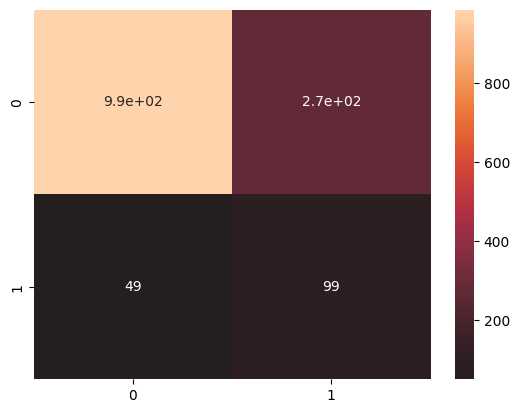

In [86]:
sns.heatmap(confusion_matrix(pred,y_test),annot=True,center=9)
plt.show()

In [87]:
result =  cross_val_score(best_knn,x_test,y_test,scoring="neg_mean_squared_error",cv=10)
print(result)
print((result).mean())
print((result).std())

[-0.26241135 -0.25531915 -0.26241135 -0.26241135 -0.26241135 -0.26241135
 -0.27659574 -0.25531915 -0.24113475 -0.27142857]
-0.2611854103343465
0.009059637509782016


* `DecisionTreeClassifier`

In [99]:
dt = DecisionTreeClassifier(min_samples_leaf=10,min_samples_split=3)
dt.fit(x_train,y_train)

DecisionTreeClassifier(min_samples_leaf=10, min_samples_split=3)

In [100]:
dt_pred = dt.predict(x_test)

In [101]:
print(classification_report(dt_pred,y_test))

              precision    recall  f1-score   support

         0.0       0.87      0.83      0.85      1084
         1.0       0.51      0.58      0.54       325

    accuracy                           0.77      1409
   macro avg       0.69      0.71      0.70      1409
weighted avg       0.79      0.77      0.78      1409



In [102]:
confusion_matrix(dt_pred,y_test)

array([[900, 184],
       [136, 189]], dtype=int64)

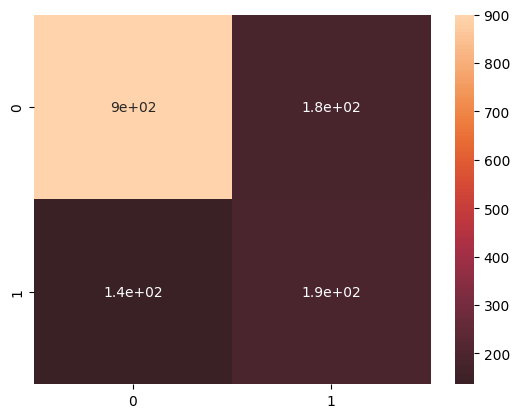

In [103]:
sns.heatmap(confusion_matrix(dt_pred,y_test),annot=True,center=13)
plt.show()

In [104]:
result =  cross_val_score(dt,x_test,y_test,scoring="neg_mean_squared_error",cv=10)
print(result)
print((result).mean())
print((result).std())

[-0.20567376 -0.21985816 -0.24822695 -0.19148936 -0.24113475 -0.25531915
 -0.19858156 -0.21985816 -0.23404255 -0.22857143]
-0.2242755825734549
0.020138581989258917


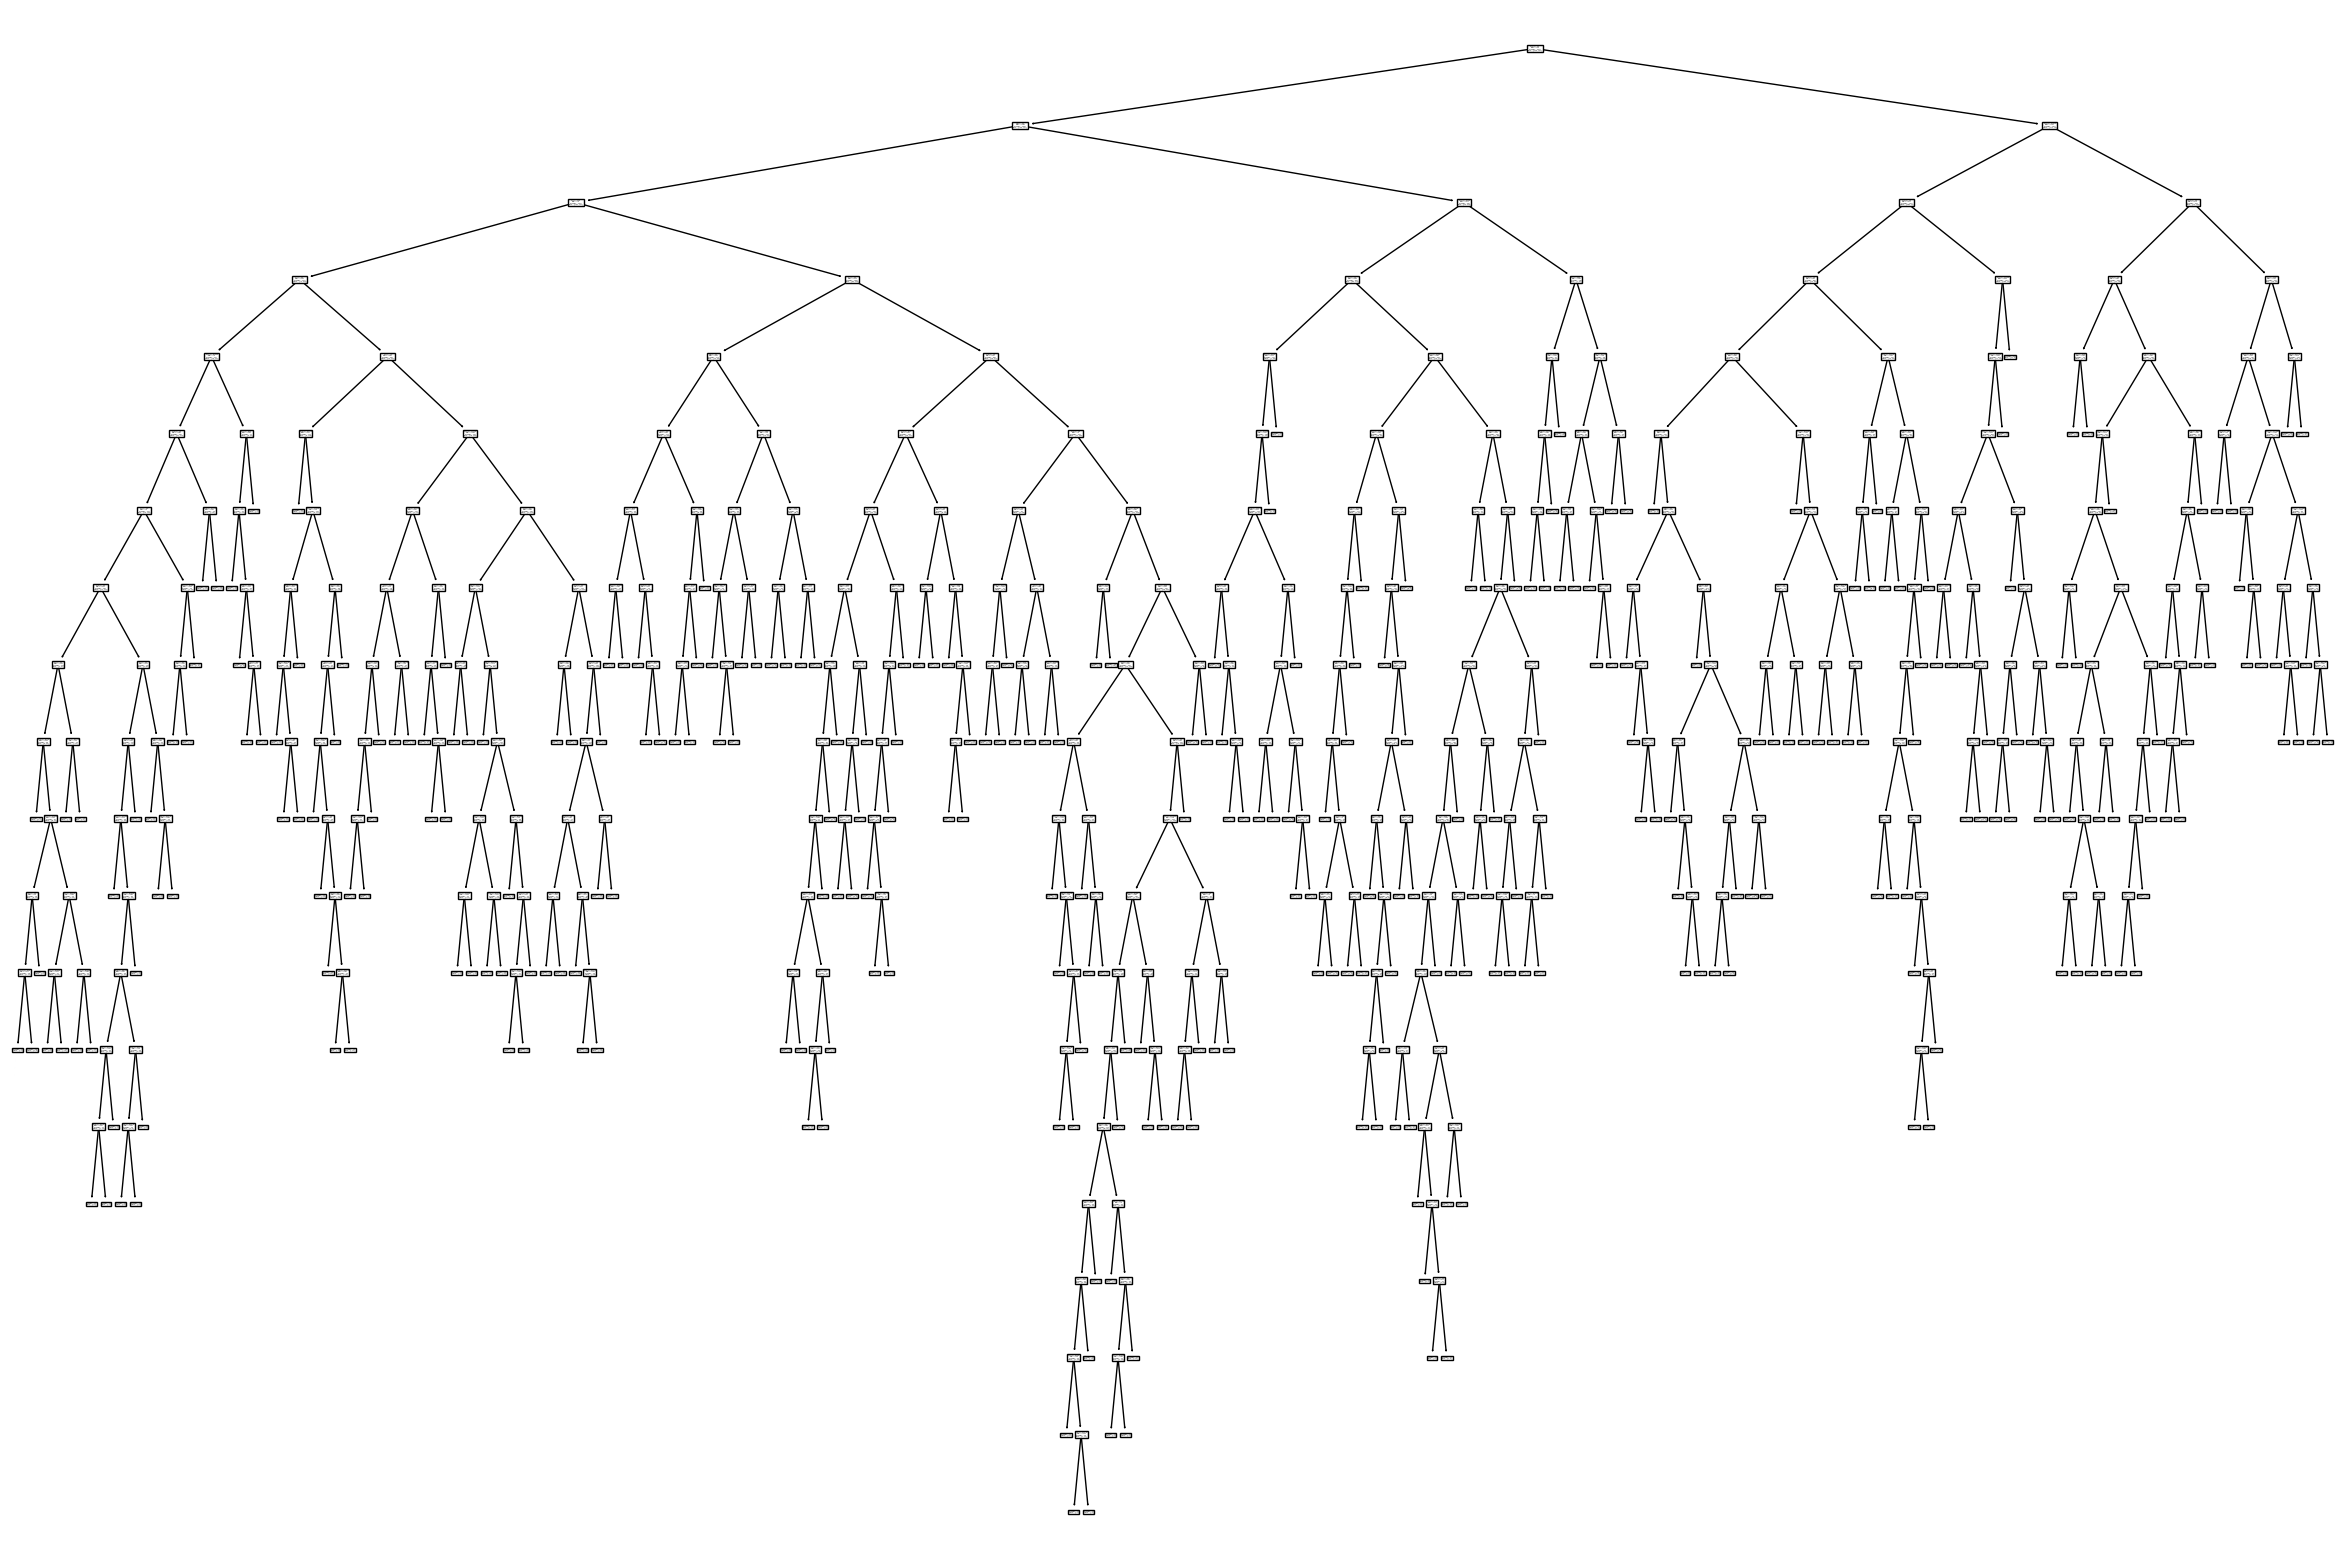

In [105]:
plt.figure(figsize=(30,20))
plot_tree(dt)
plt.show()

* `SVC`

In [107]:
svc = SVC()
svc.fit(x_train,y_train)

SVC()

In [112]:
svc_pred = svc.predict(x_test)

In [113]:
print(classification_report(y_test,svc_pred))

              precision    recall  f1-score   support

         0.0       0.74      1.00      0.85      1036
         1.0       0.00      0.00      0.00       373

    accuracy                           0.74      1409
   macro avg       0.37      0.50      0.42      1409
weighted avg       0.54      0.74      0.62      1409



In [114]:
confusion_matrix(svc_pred,y_test)

array([[1036,  373],
       [   0,    0]], dtype=int64)

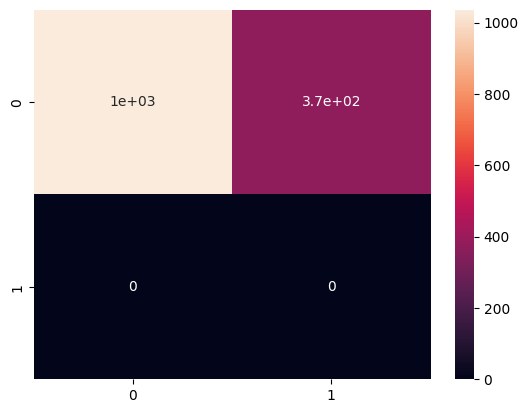

In [115]:
sns.heatmap(confusion_matrix(svc_pred,y_test),annot=True)
plt.show()

In [116]:
result =  cross_val_score(svc,x_test,y_test,scoring="neg_mean_squared_error",cv=10)
print(result)
print((result).mean())
print((result).std())

[-0.26950355 -0.26950355 -0.26950355 -0.26241135 -0.26241135 -0.26241135
 -0.26241135 -0.26241135 -0.26241135 -0.26428571]
-0.26472644376899696
0.0031751281299421453
